Note book para desarrollar funciones

In [1]:
#Se importan los paquetes basico necesarios
import pandas as pd
import geopandas as gpd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import numpy as np
from IPython.display import Markdown as md #Este paquete sirve para escribir párrafos que se modifican automáticamente
import plotly
import plotly.express as px
import plotly.graph_objects as go
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import mapclassify
import contextily as ctx
import matplotlib.pyplot as plt

#Se centran los outputs para que después haya un mejor display
from IPython.display import display, HTML

CSS = """
.output {
    align-items: center;
}
"""

HTML('<style>{}</style>'.format(CSS))

import warnings
warnings.filterwarnings('ignore')

#Esto garantiza que se puedan ver los objetos de plotly
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot
init_notebook_mode(connected=True)

In [2]:
#sys.prefix
sys.path.append('/Users/Daniel/OneDrive - C- ANALISIS SAS/programacion/funciones/')

In [3]:
#Estilos para pandas
pd.options.display.float_format = '{:,.2f}'.format

In [4]:
import mapas

In [5]:
paths = mapas.diccionario_rutas()

In [6]:
def indice_municpio(cod_mpio):
    """Retorna la fila que corresponde al municipio en el archivo 'municipos' del diccionario paths.
        Parametros:
            cod_mpio (str): Código del municipio en formato string"""
    inds = pd.read_csv(paths['municipios_indices'], 
                      dtype={'DPTOMPIO':str},
                      index_col=0)
    ind = inds[inds['DPTOMPIO']==cod_mpio]

    return ind.index.to_list()[0]+1

In [8]:
row=indice_municpio('54720')

In [9]:
#Generic map for a given municipality

def mapa_municipal(cod_mpio, coca='coca19', figsize=(15, 15)):
    """Retorna un mapa de matplot lib con la vereda, y el lote resaltados en el municipio.
            Parametros:
                cod_mpio (str): Código del municipio en formato string
                coca (str): Nombre las capas de coca de 2001-19, escrito como cocaYY
                figsize : tuple of integers (default None)
                        Size of the resulting matplotlib.figure.Figure. If the argument
                        axes is given explicitly, figsize is ignored."""
    
    row=indice_municpio(cod_mpio)
    df = mapas.cargar_capa_individual(paths['municipios'], rows=slice(row-1,row))
    
    #df = mpios[mpios['DPTOMPIO']==cod_mpio]
    fig = df.plot(figsize=figsize, color='white', alpha=0.01)

    #Get the bounding box to cut the other layers
    bbx = df.envelope

    #Se establecen los límites del mapa con base en los límites del municipio
    b = df.total_bounds
    fig.set_xlim(b[0]*1.00005, b[2]*1.00005)
    fig.set_ylim(b[1]*1.00005, b[3]*1.00005)

    #Se cargan las capas
    coca = mapas.cargar_capa_individual(paths[coca],mask=bbx) #Coca
    coca.plot(ax=fig, column='areacoca', cmap='Reds', alpha=0.3)
    vrds = mapas.cargar_capa_individual(paths['vrds'], mask=df) #Veredas
    vrds.plot(ax=fig, edgecolor='black', alpha=0.001)  
    #Labels for veredas
    vrds.apply(lambda x: fig.annotate(s=x['NOMBRE_VER'], xy=x.geometry.centroid.coords[0], ha='center', fontsize=7),axis=1);
    vrds.boundary.plot(ax=fig, color='black') #Draw boundaries for veredas
    
    #df2.plot(ax=fig, figsize=(10, 10), color='grey', alpha=0.5)
    #Se grafican las fronteras de las capas
    df.boundary.plot(ax=fig, color='black')
    #

    #Titulo
    municipio = df['NOMB_MPIO'].iloc[0].capitalize()
    depto = df['NOM_DEP'].iloc[0].capitalize()
    title = 'Mapa diagnóstico de {}, {}'.format(municipio, depto)
    fig.set_title(title,
                fontdict={'fontsize': 16})

    #Se grafica el lote con base en las coordenadas recibidas
    ctx.add_basemap(ax=fig, crs=df.crs.to_string())
    fig.set_axis_off()

    #Legenda
    #veredas_municipo = mpatches.Patch(color='red', label='Coca en 20'.format(coca[-2:]))
    
    return fig   
                                    

Cargando capa
Capa cargada
Ajustando capa
Capa ajustada
The function got to the end
Cargando capa
Capa cargada
Ajustando capa
Capa ajustada
Final layer clipped to the mask extent for accuracy
Cargando capa
Capa cargada
Ajustando capa
Capa ajustada
Final layer clipped to the mask extent for accuracy


<AxesSubplot:title={'center':'Mapa diagnóstico de Sardinata, Norte de santander'}>

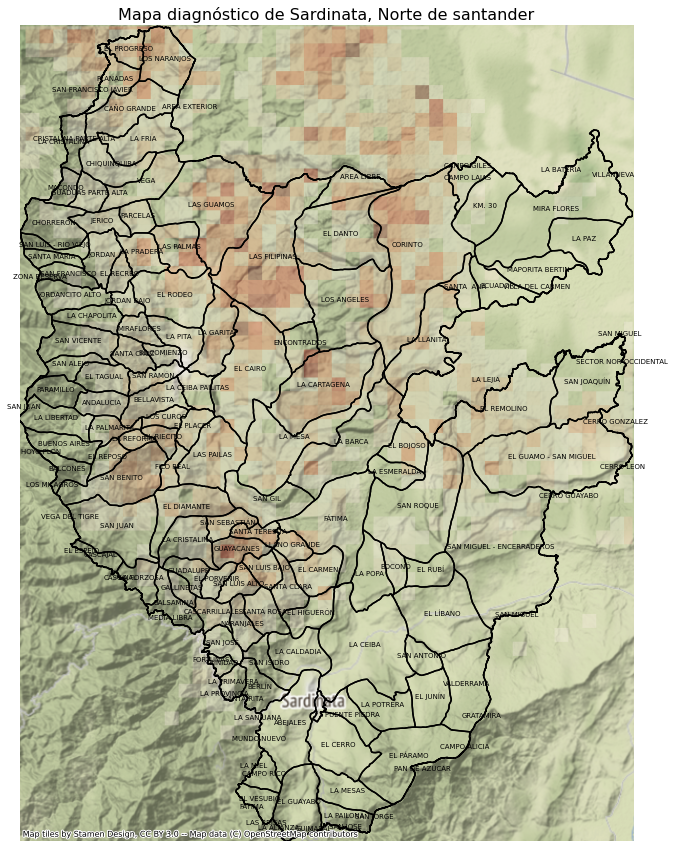

In [11]:
mapa_municipal('54720')

In [ ]:
vrds['NOMBRE_VER']

In [ ]:
mpios.to_postgis()

In [ ]:
#Agregar la información de MAP

In [ ]:
    #vereda = mpatches.Patch(color='grey', label='Vereda en la que se ubica el lote')
    #lote = mpatches.Patch(color='yellow', label='Lote')
    #plt.legend(handles=[veredas_municipo])